In [15]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Initializing files

In [2]:
EmissionsPerCar = pd.read_csv('CO2_Emissions.csv')

In [12]:
CarRating = pd.DataFrame(columns= ['Make', 'Model', 'Rating'])
CarRating['Make'] = EmissionsPerCar['Make']
CarRating['Model'] = EmissionsPerCar['Model']

CarRating['Rating'] = 10 - (EmissionsPerCar['CO2 Emissions(g/km)']/52.2)
max_rating = CarRating.loc[CarRating['Rating'].idxmax()]
min_rating = CarRating.loc[CarRating['Rating'].idxmin()]
AverageRating = CarRating['Rating'].mean()

print("The car with the best rating is a " + str(max_rating['Make']) +" " + str(max_rating['Model']) + " with a rating of " + str(max_rating['Rating']))
print("The car with the worst rating is "+ str(min_rating['Make']) +" " + str(min_rating['Model']) + " with a rating of " + str(min_rating['Rating']))
print("The average rating of the 7200 car models is " + str(AverageRating))
display(CarRating)
display(EmissionsPerCar)


The car with the best rating is a HYUNDAI IONIQ BLUE with a rating of 8.160919540229886
The car with the worst rating is BUGATTI CHIRON with a rating of 0.0
The average rating of the 7200 car models is 5.1995268445668845


,Make,Model,Rating
0,ACURA,ILX,6.245211
1,ACURA,ILX,5.766284
2,ACURA,ILX HYBRID,7.394636
3,ACURA,MDX 4WD,5.114943
4,ACURA,RDX AWD,5.325670
...,...,...,...
7380,VOLVO,XC40 T5 AWD,5.804598
7381,VOLVO,XC60 T5 AWD,5.555556
7382,VOLVO,XC60 T6 AWD,5.402299
7383,VOLVO,XC90 T5 AWD,5.555556


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


Electric Vehicles
Our goal here is to create an estimate of the equivalent CO2 emmited by Electric Cars.  This can be done fairly easily by using the stats of how many WattHours(wH) a specific electric car uses per kilometer, and multiply by well broadcasted data of how many Kg CO2 is emmited by producing one KwH of energy in the US

In [ ]:
CO2toWh = 0.3712


Manufacturing
-Lithium Ion Production
Initializing a Dataframe with General Emissions for Lithium Ion Battery of kWh size All of the data is in kg. I will then plot the values of manufacturing the Batteries to find their best-fit Equations. These equations can then be used to find the amount of carbon emmited for batteries of any size.  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


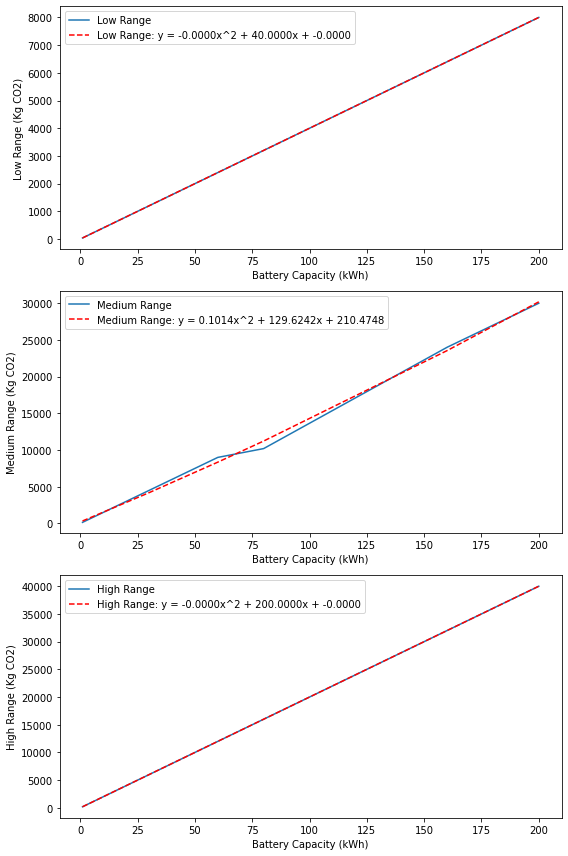

Low Range: y = -0.0000x^2 + 40.0000x + -0.0000
Medium Range: y = 0.1014x^2 + 129.6242x + 210.4748
High Range: y = -0.0000x^2 + 200.0000x + -0.0000


In [16]:
LithiumCO2 = pd.read_csv('LithiumBatteryManufacturing.csv')

def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c


x_values = LithiumCO2['Battery Capacity (kWh)']

y_low_range = LithiumCO2['Low Range (Kg CO2)']
y_medium_range = LithiumCO2['Medium Range (Kg CO2)']
y_high_range = LithiumCO2['High Range (Kg CO2)']

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

best_fit_parameters = []

params_low_range, covariance_low_range = curve_fit(quadratic_func, x_values, y_low_range)
best_fit_parameters.append(params_low_range)
equation_low_range = f'Low Range: y = {params_low_range[0]:.4f}x^2 + {params_low_range[1]:.4f}x + {params_low_range[2]:.4f}'
axes[0].plot(x_values, y_low_range, label='Low Range')
axes[0].plot(x_values, quadratic_func(x_values, *params_low_range), 'r--', label=equation_low_range)
axes[0].set_xlabel('Battery Capacity (kWh)')
axes[0].set_ylabel('Low Range (Kg CO2)')
axes[0].legend()

params_medium_range, covariance_medium_range = curve_fit(quadratic_func, x_values, y_medium_range)
best_fit_parameters.append(params_medium_range)
equation_medium_range = f'Medium Range: y = {params_medium_range[0]:.4f}x^2 + {params_medium_range[1]:.4f}x + {params_medium_range[2]:.4f}'
axes[1].plot(x_values, y_medium_range, label='Medium Range')
axes[1].plot(x_values, quadratic_func(x_values, *params_medium_range), 'r--', label=equation_medium_range)
axes[1].set_xlabel('Battery Capacity (kWh)')
axes[1].set_ylabel('Medium Range (Kg CO2)')
axes[1].legend()

params_high_range, covariance_high_range = curve_fit(quadratic_func, x_values, y_high_range)
best_fit_parameters.append(params_high_range)
equation_high_range = f'High Range: y = {params_high_range[0]:.4f}x^2 + {params_high_range[1]:.4f}x + {params_high_range[2]:.4f}'
axes[2].plot(x_values, y_high_range, label='High Range')
axes[2].plot(x_values, quadratic_func(x_values, *params_high_range), 'r--', label=equation_high_range)
axes[2].set_xlabel('Battery Capacity (kWh)')
axes[2].set_ylabel('High Range (Kg CO2)')
axes[2].legend()

plt.tight_layout()
plt.show()

for i, params in enumerate(best_fit_parameters):
    if i == 0:
        print(equation_low_range)
    elif i == 1:
        print(equation_medium_range)
    elif i == 2:
        print(equation_high_range)
